In [1]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import os

c:\Users\Propietario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
N = 2000
time_sample_length = 100
l0 = 0.01
lf = 15
tf = 1

lc = np.linspace(l0, lf, N)
t = np.linspace(0, tf, time_sample_length)

path_read = "C:\\Users\\Propietario\\Desktop\\ib\\5-Maestría\\GenData-PCA-UMAP\\Datos\\Datos_PCA"
save_path = "C:\\Users\\Propietario\\Desktop\\ib\\5-Maestría\\GenData-PCA-UMAP\\Datos\\Plots\\UMAP\\"
data_signals = pd.read_csv(os.path.join(path_read, "df_PCA_Signals.csv"))
data_probd = pd.read_csv(os.path.join(path_read, "df_PCA_Probd_80var.csv")).values.transpose()

lcms = data_signals["lcm"].values
sigmas = data_signals["σs"].values

#data_signals = data_signals.drop(["lcm", "σs"], axis=1).values

#UMAP parameters
n_components = 2
min_dist_list = [0, 0.05, 0.1, 0.5, 1]
n_neighbors_list = [5, 15, 30, 50, 100]

KeyboardInterrupt: 

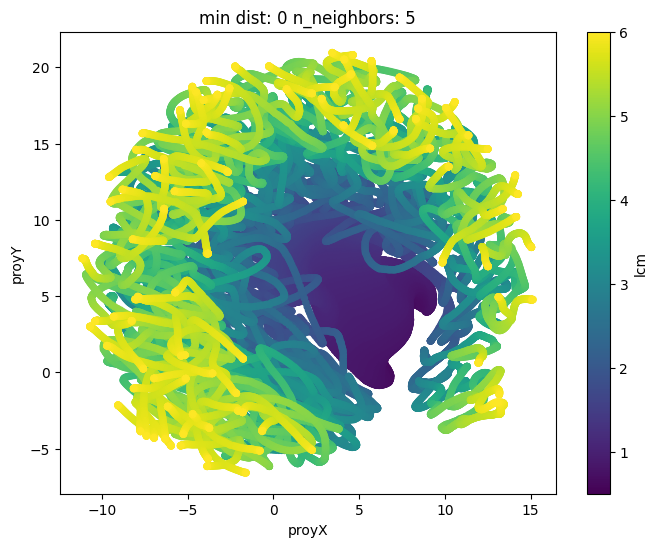

In [3]:
embedding_OUT_plots = []

for i in range(len(n_neighbors_list)):
    for j in range(len(min_dist_list)):
        n_neighbors = n_neighbors_list[i]
        min_dist = min_dist_list[j]

        embeddingOUT = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components).fit_transform(data_probd)

        df_UMAPprobd = pd.DataFrame({
            'σs': sigmas,
            'lcm': lcms,
            'proyX': embeddingOUT[:, 0],
            'proyY': embeddingOUT[:, 1]
        })

        plot_UMAPprobd = df_UMAPprobd.plot.scatter(
            x='proyX',
            y='proyY',
            c='lcm',
            cmap='viridis',
            legend=False,
            title=f"min dist: {min_dist} n_neighbors: {n_neighbors}",
            figsize=(8, 6)
        )
        
        plot_UMAPprobd.figure.savefig(os.path.join(save_path, f"UMAP_min_dist_{min_dist}_n_neighbors_{n_neighbors}.png"))

In [ ]:


# # Plot all the UMAPs in a 2x2 plot
# fig, ax = plt.subplots(2, 2, figsize=(16, 12))
# ax[0, 0] = embedding_OUT_plots[0].get_figure()
# ax[0, 1] = embedding_OUT_plots[1]
# ax[1, 0] = embedding_OUT_plots[2]
# ax[1, 1] = embedding_OUT_plots[3]